# Challenge 1

Whitney Chia
with help from Matthew Mitchell

In [35]:
import csv
from datetime import date
from datetime import datetime

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

%matplotlib inline

In [2]:
with open('turnstile_160625.txt', 'rb') as f:
    csv_f = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in csv_f]

In [3]:
June_2016 = {}
for row in rows:
    June_2016.setdefault(tuple(row[:4]), []).append(row[4:])

rows.pop(0)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [4]:
print June_2016.items()[0]

(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'), [['A', 'IND', '06/18/2016', '01:00:00', 'REGULAR', '0007345027', '0002914431'], ['A', 'IND', '06/18/2016', '05:00:00', 'REGULAR', '0007345099', '0002914457'], ['A', 'IND', '06/18/2016', '09:00:00', 'REGULAR', '0007345458', '0002914492'], ['A', 'IND', '06/18/2016', '13:00:00', 'REGULAR', '0007345760', '0002914579'], ['A', 'IND', '06/18/2016', '17:00:00', 'REGULAR', '0007346009', '0002914659'], ['A', 'IND', '06/18/2016', '21:00:00', 'REGULAR', '0007346223', '0002914757'], ['A', 'IND', '06/19/2016', '01:00:00', 'REGULAR', '0007346373', '0002914824'], ['A', 'IND', '06/19/2016', '05:00:00', 'REGULAR', '0007346411', '0002914855'], ['A', 'IND', '06/19/2016', '09:00:00', 'REGULAR', '0007346540', '0002914888'], ['A', 'IND', '06/19/2016', '13:00:00', 'REGULAR', '0007346713', '0002914938'], ['A', 'IND', '06/19/2016', '17:00:00', 'REGULAR', '0007346942', '0002915057'], ['A', 'IND', '06/19/2016', '21:00:00', 'REGULAR', '0007347182', '0002915172'], ['A

# Challenge 2

In [5]:
import dateutil.parser
second_dict = {}

for row in rows:
    keys = tuple((row[:4]))
    datetime_val = str(row[6]) + " " + str(row[7])
    new_date = dateutil.parser.parse(datetime_val)
    second_dict.setdefault(keys, []).append([new_date, int(row[9])])

In [6]:
print second_dict.items()[0:1]

[(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'), [[datetime.datetime(2016, 6, 18, 1, 0), 7345027], [datetime.datetime(2016, 6, 18, 5, 0), 7345099], [datetime.datetime(2016, 6, 18, 9, 0), 7345458], [datetime.datetime(2016, 6, 18, 13, 0), 7345760], [datetime.datetime(2016, 6, 18, 17, 0), 7346009], [datetime.datetime(2016, 6, 18, 21, 0), 7346223], [datetime.datetime(2016, 6, 19, 1, 0), 7346373], [datetime.datetime(2016, 6, 19, 5, 0), 7346411], [datetime.datetime(2016, 6, 19, 9, 0), 7346540], [datetime.datetime(2016, 6, 19, 13, 0), 7346713], [datetime.datetime(2016, 6, 19, 17, 0), 7346942], [datetime.datetime(2016, 6, 19, 21, 0), 7347182], [datetime.datetime(2016, 6, 20, 1, 0), 7347353], [datetime.datetime(2016, 6, 20, 5, 0), 7347453], [datetime.datetime(2016, 6, 20, 9, 0), 7348284], [datetime.datetime(2016, 6, 20, 13, 0), 7348547], [datetime.datetime(2016, 6, 20, 14, 19, 20), 7348602], [datetime.datetime(2016, 6, 20, 17, 0), 7348781], [datetime.datetime(2016, 6, 20, 21, 0), 7348987], [dat

In [7]:
for rows in second_dict.values():
    assert rows == sorted(rows)

In [8]:
third_dict = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in second_dict.items()}

In [9]:
print third_dict.items()[0]

(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'), [[datetime.datetime(2016, 6, 18, 1, 0), 72, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 18, 5, 0), 359, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 18, 9, 0), 302, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 18, 13, 0), 249, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 18, 17, 0), 214, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 18, 21, 0), 150, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 19, 1, 0), 38, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 19, 5, 0), 129, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 19, 9, 0), 173, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 19, 13, 0), 229, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 19, 17, 0), 240, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 19, 21, 0), 171, datetime.timedelta(0, 14400)], [datetime.datetime(2016, 6, 20, 1, 0), 100, dat

In [10]:
all_counts = [count for rows in third_dict.values() for _, count, _ in rows]
all_counts.sort()
print all_counts[-50:]

[2440, 2461, 2470, 2477, 2477, 2478, 2481, 2488, 2489, 2490, 2490, 2514, 2515, 2524, 2530, 2541, 2545, 2551, 2557, 2559, 2588, 2609, 2623, 2632, 2653, 2657, 2659, 2660, 2661, 2672, 2676, 2693, 2719, 2740, 2754, 2763, 2766, 2771, 2782, 2868, 2874, 2878, 2886, 2929, 2994, 3083, 3148, 3255, 134216914, 1119107680]


In [11]:
from collections import Counter

all_times = [duration.total_seconds() / 60 / 60
             for rows in third_dict.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4.0, 173540), (4.2, 10377), (8.0, 172), (4.433333333333334, 168), (0.022500000000000003, 44), (0.19361111111111112, 33), (3.806388888888889, 33), (0.02222222222222222, 30), (3.108611111111111, 22), (1.6830555555555555, 22)]


In [12]:
datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in third_dict.items()}

In [13]:
print datetime_counts.items()[0]

(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'), [(datetime.datetime(2016, 6, 18, 1, 0), 72), (datetime.datetime(2016, 6, 18, 5, 0), 359), (datetime.datetime(2016, 6, 18, 9, 0), 302), (datetime.datetime(2016, 6, 18, 13, 0), 249), (datetime.datetime(2016, 6, 18, 17, 0), 214), (datetime.datetime(2016, 6, 18, 21, 0), 150), (datetime.datetime(2016, 6, 19, 1, 0), 38), (datetime.datetime(2016, 6, 19, 5, 0), 129), (datetime.datetime(2016, 6, 19, 9, 0), 173), (datetime.datetime(2016, 6, 19, 13, 0), 229), (datetime.datetime(2016, 6, 19, 17, 0), 240), (datetime.datetime(2016, 6, 19, 21, 0), 171), (datetime.datetime(2016, 6, 20, 1, 0), 100), (datetime.datetime(2016, 6, 20, 5, 0), 831), (datetime.datetime(2016, 6, 20, 9, 0), 263), (datetime.datetime(2016, 6, 20, 13, 0), 55), (datetime.datetime(2016, 6, 20, 14, 19, 20), 179), (datetime.datetime(2016, 6, 20, 17, 0), 206), (datetime.datetime(2016, 6, 20, 21, 0), 101), (datetime.datetime(2016, 6, 21, 1, 0), 38), (datetime.datetime(2016, 6, 21, 5, 0), 6

# Challenge 3

In [14]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

In [15]:
print day_counts['N134', 'R385', '00-00-00', 'ROCKAWAY BLVD']

[(datetime.date(2016, 6, 18), 1346), (datetime.date(2016, 6, 19), 980), (datetime.date(2016, 6, 20), 1735), (datetime.date(2016, 6, 21), 1464), (datetime.date(2016, 6, 22), 1688), (datetime.date(2016, 6, 23), 1626), (datetime.date(2016, 6, 24), 1016)]


# Challenge 4

In [16]:
import matplotlib.pyplot as plt
% matplotlib inline

In [17]:
N134 = day_counts[('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD')]

In [18]:
print N134

[(datetime.date(2016, 6, 18), 1346), (datetime.date(2016, 6, 19), 980), (datetime.date(2016, 6, 20), 1735), (datetime.date(2016, 6, 21), 1464), (datetime.date(2016, 6, 22), 1688), (datetime.date(2016, 6, 23), 1626), (datetime.date(2016, 6, 24), 1016)]


In [19]:
day_list = []
count_list = []
for value in N134:
    day_list.append(value[0])
    
for value in N134:
    count_list.append(value[1])

<Container object of 7 artists>

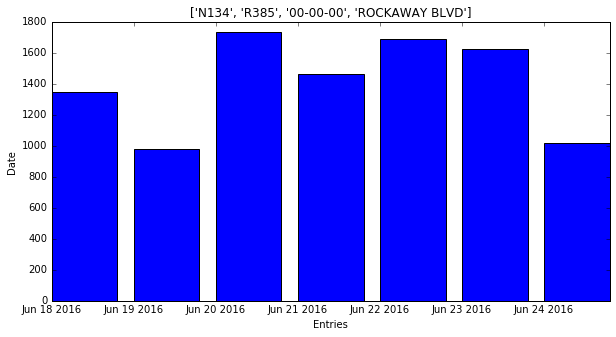

In [22]:
plt.figure(figsize=(10,5))
plt.ylabel('Date')
plt.xlabel('Entries')
plt.title(['N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'])
plt.bar(day_list,count_list)

# Challenge 5

In [28]:
challenge_5_dict = {}
for key, value in day_counts.items():
    prev_running_totals = {}
    turnstile_daily_counts = {}
    current_running_totals = {}
    new_key = (key[0], key[1], key[3])
    for date, count in challenge_5_dict.setdefault(new_key,[]):
        prev_running_totals[date] = count
    for date, count in value:
        current_running_totals[date] = prev_running_totals.get(date, 0) + count
    challenge_5_dict[new_key] = sorted(current_running_totals.items())

In [29]:
print challenge_5_dict['N134', 'R385', 'ROCKAWAY BLVD']

[(datetime.date(2016, 6, 18), 3183), (datetime.date(2016, 6, 19), 2059), (datetime.date(2016, 6, 20), 4066), (datetime.date(2016, 6, 21), 4175), (datetime.date(2016, 6, 22), 4209), (datetime.date(2016, 6, 23), 4095), (datetime.date(2016, 6, 24), 3940)]


# Challenge 6

In [30]:
challenge_6_dict = {}
for key, value in day_counts.items():
    prev_running_totals = {}
    turnstile_daily_counts = {}
    current_running_totals = {}
    new_key = (key[3])
    for date, count in challenge_6_dict.setdefault(new_key,[]):
        prev_running_totals[date] = count
    for date, count in value:
        current_running_totals[date] = prev_running_totals.get(date, 0) + count
    challenge_6_dict[new_key] = sorted(current_running_totals.items())

In [31]:
print challenge_6_dict['ROCKAWAY BLVD']

[(datetime.date(2016, 6, 18), 8781), (datetime.date(2016, 6, 19), 6460), (datetime.date(2016, 6, 20), 7647), (datetime.date(2016, 6, 21), 7828), (datetime.date(2016, 6, 22), 7833), (datetime.date(2016, 6, 23), 7738), (datetime.date(2016, 6, 24), 7480)]


# Challenge 7

In [33]:
gc_station = challenge_6_dict['GRD CNTRL-42 ST']

In [34]:
day_list_gc = []
count_list_gc = []
for value in gc_station:
    day_list_gc.append(value[0])
    
for value in gc_station:
    count_list_gc.append(value[1])

(0, 150000)

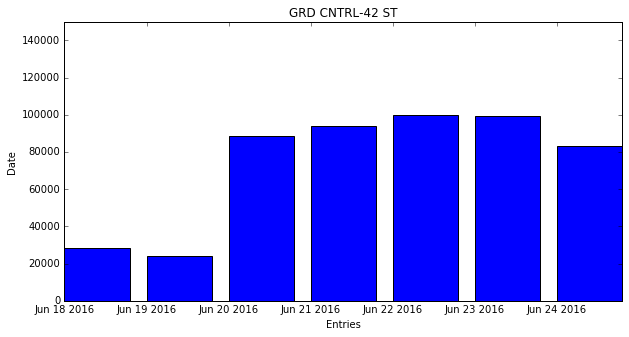

In [44]:
plt.figure(figsize=(10,5))
plt.ylabel('Date')
plt.xlabel('Entries')
plt.title('GRD CNTRL-42 ST')
plt.bar(day_list_gc,count_list_gc)
plt.ylim([0,150000])

# Challenge 8, switching to pandas

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
week_1 = pd.read_csv('turnstile_160625.txt', sep=',')
week_2 = pd.read_csv('turnstile_160618.txt', sep=',')
week_3 = pd.read_csv('turnstile_160611.txt', sep=',')
week_4 = pd.read_csv('turnstile_160604.txt', sep=',')

In [3]:
week_1.columns= map(lambda x: x.strip(), week_1.columns)
week_2.columns= map(lambda x: x.strip(), week_2.columns)
week_3.columns= map(lambda x: x.strip(), week_3.columns)
week_4.columns= map(lambda x: x.strip(), week_4.columns)

In [5]:
week_1[['ENTRIES', 'EXITS']] = week_1[['ENTRIES', 'EXITS']].astype(np.int)
week_1['TIME'] = [pd.to_datetime(time) for time in week_1['TIME']]
week_2[['ENTRIES', 'EXITS']] = week_2[['ENTRIES', 'EXITS']].astype(np.int)
week_2['TIME'] = [pd.to_datetime(time) for time in week_2['TIME']]
week_3[['ENTRIES', 'EXITS']] = week_3[['ENTRIES', 'EXITS']].astype(np.int)
week_3['TIME'] = [pd.to_datetime(time) for time in week_3['TIME']]
week_4[['ENTRIES', 'EXITS']] = week_4[['ENTRIES', 'EXITS']].astype(np.int)
week_4['TIME'] = [pd.to_datetime(time) for time in week_4['TIME']]

In [6]:
week_1 = week_1.sort_values(by = ['UNIT','SCP','STATION','DATE','TIME'])
week_2 = week_2.sort_values(by = ['UNIT','SCP','STATION','DATE','TIME'])
week_3 = week_3.sort_values(by = ['UNIT','SCP','STATION','DATE','TIME'])
week_4 = week_4.sort_values(by = ['UNIT','SCP','STATION','DATE','TIME'])

In [7]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

week_1['DATE'] = pd.to_datetime(week_1['DATE'])
week_1['day_of_week'] = week_1['DATE'].dt.dayofweek
week_1['day_type'] = ['Weekday' if x < 5 else 'Weekend' for x in week_1['day_of_week']]
week_1['day'] = week_1['day_of_week'].apply(lambda x: days[x])
                                            
week_2['DATE'] = pd.to_datetime(week_2['DATE'])
week_2['day_of_week'] = week_2['DATE'].dt.dayofweek
week_2['day_type'] = ['Weekday' if x < 5 else 'Weekend' for x in week_2['day_of_week']]
week_2['day'] = week_2['day_of_week'].apply(lambda x: days[x])
                                            
week_3['DATE'] = pd.to_datetime(week_3['DATE'])
week_3['day_of_week'] = week_3['DATE'].dt.dayofweek
week_3['day_type'] = ['Weekday' if x < 5 else 'Weekend' for x in week_3['day_of_week']]
week_3['day'] = week_3['day_of_week'].apply(lambda x: days[x])
                                            
week_4['DATE'] = pd.to_datetime(week_4['DATE'])
week_4['day_of_week'] = week_4['DATE'].dt.dayofweek
week_4['day_type'] = ['Weekday' if x < 5 else 'Weekend' for x in week_4['day_of_week']]
week_4['day'] = week_4['day_of_week'].apply(lambda x: days[x])

In [8]:
week_1['Net_Entries'] = week_1.groupby([ 'UNIT', 'SCP', 'STATION'])['ENTRIES'].diff()
week_1['Net_Exits'] = week_1.groupby(['UNIT', 'SCP', 'STATION'])['EXITS'].diff()
week_2['Net_Entries'] = week_2.groupby([ 'UNIT', 'SCP', 'STATION'])['ENTRIES'].diff()
week_2['Net_Exits'] = week_2.groupby(['UNIT', 'SCP', 'STATION'])['EXITS'].diff()
week_3['Net_Entries'] = week_3.groupby([ 'UNIT', 'SCP', 'STATION'])['ENTRIES'].diff()
week_3['Net_Exits'] = week_3.groupby(['UNIT', 'SCP', 'STATION'])['EXITS'].diff()
week_4['Net_Entries'] = week_4.groupby([ 'UNIT', 'SCP', 'STATION'])['ENTRIES'].diff()
week_4['Net_Exits'] = week_4.groupby(['UNIT', 'SCP', 'STATION'])['EXITS'].diff()

In [9]:
week_1[week_1['Net_Entries'] > 28800] = np.nan
week_1[week_1['Net_Entries'] < 0] = np.nan
week_2[week_2['Net_Entries'] > 28800] = np.nan
week_2[week_2['Net_Entries'] < 0] = np.nan
week_3[week_3['Net_Entries'] > 28800] = np.nan
week_3[week_3['Net_Entries'] < 0] = np.nan
week_4[week_4['Net_Entries'] > 28800] = np.nan
week_4[week_4['Net_Entries'] < 0] = np.nan

In [10]:
GC_week_1 = week_1[week_1['STATION'] == 'GRD CNTRL-42 ST']
GC_week_2 = week_2[week_2['STATION'] == 'GRD CNTRL-42 ST']
GC_week_3 = week_3[week_3['STATION'] == 'GRD CNTRL-42 ST']
GC_week_4 = week_4[week_4['STATION'] == 'GRD CNTRL-42 ST']

In [68]:
Days = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

GC_1 = GC_week_1.groupby(['day'])['Net_Entries'].sum()
GC_2 = GC_week_2.groupby(['day'])['Net_Entries'].sum()
GC_3 = GC_week_3.groupby(['day'])['Net_Entries'].sum()
GC_4 = GC_week_4.groupby(['day'])['Net_Entries'].sum()

In [69]:
GC_1.index = pd.CategoricalIndex(GC_1.index, 
                    categories=['Mon','Tues','Weds','Thurs','Fri','Sat','Sun'], 
                    ordered=True)

GC_2.index = pd.CategoricalIndex(GC_2.index, 
                    categories=['Mon','Tues','Weds','Thurs','Fri','Sat','Sun'], 
                    ordered=True)

GC_3.index = pd.CategoricalIndex(GC_3.index, 
                    categories=['Mon','Tues','Weds','Thurs','Fri','Sat','Sun'], 
                    ordered=True)

GC_4.index = pd.CategoricalIndex(GC_4.index, 
                    categories=['Mon','Tues','Weds','Thurs','Fri','Sat','Sun'], 
                    ordered=True)

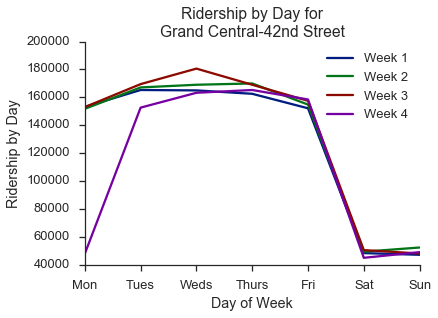

In [74]:
ax = GC_1.sort_index().plot(label='Week 1')
_ = GC_2.sort_index().plot(ax=ax, label='Week 2')
_ = GC_3.sort_index().plot(ax=ax, label='Week 3')
_ = GC_4.sort_index().plot(ax=ax, label='Week 4')
ax.legend(loc=0)
sns.despine()
ax.set_xlabel('Day of Week')
ax.set_ylabel('Ridership by Day')
ax.set_title('Ridership by Day for\nGrand Central-42nd Street')

In [26]:
type(GC_1.to_frame())

pandas.core.frame.DataFrame

,Net_Entries
0,"{u'Sun': 47091.0, u'Fri': 152125.0, u'Thurs': ..."
1,"{u'Sun': 52321.0, u'Fri': 154778.0, u'Thurs': ..."
2,"{u'Sun': 48017.0, u'Fri': 157484.0, u'Thurs': ..."
3,"{u'Sun': 49018.0, u'Fri': 158450.0, u'Thurs': ..."


In [237]:
import matplotlib.pyplot as plt
% matplotlib inline
GC.plot(style='o-')

TypeError: Empty 'DataFrame': no numeric data to plot

# Challenge 9, switching to pandas

In [64]:
past_month_MTA = pd.read_csv('June_2016_for_pd.txt', sep='\t')

In [65]:
past_month_MTA = pd.DataFrame(past_month_MTA)

In [83]:
past_month_MTA.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [67]:
past_month_MTA.columns= map(lambda x: x.strip(), past_month_MTA.columns)

In [84]:
past_month_MTA[['ENTRIES', 'EXITS']] = past_month_MTA[['ENTRIES', 'EXITS']].astype(np.int)
past_month_MTA['TIME'] = [pd.to_datetime(time) for time in past_month_MTA['TIME']]

In [85]:
past_month_MTA = past_month_MTA.sort_values(by = ['UNIT','SCP','STATION','DATE','TIME'])

In [86]:
past_month_MTA['Net_Entries'] = past_month_MTA.groupby([ 'UNIT', 'SCP', 'STATION'])['ENTRIES'].diff()
past_month_MTA['Net_Exits'] = past_month_MTA.groupby(['UNIT', 'SCP', 'STATION'])['EXITS'].diff()

In [61]:
# #At a granular level of Traffic per turnstile per 4 hour period, it would be very close to physically impossible
# #for the total number of Traffic in a 4 hour period to be greater than 1 per second. So, I am treating the data
# #that is greater than 2 per second as bad data. 60*60*4*2 = 28800
# past_month_MTA[past_month_MTA['Net_Entries'] > 28800] = np.nan
# past_month_MTA[past_month_MTA['Net_Entries'] < 0] = np.nan
# past_month_MTA[past_month_MTA['Net_Exits'] > 28800] = np.nan
# past_month_MTA[past_month_MTA['Net_Exits'] < 0] = np.nan

TypeError: 'numpy.dtype' object is not callable

In [87]:
past_month_MTA.head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Net_Entries,Net_Exits
10288,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/28/16,2016-07-12 01:00:00,REGULAR,1770933,1646742,NaN,NaN
10289,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/28/16,2016-07-12 05:00:00,REGULAR,1770941,1646748,8.0,6.0
10290,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/28/16,2016-07-12 09:00:00,REGULAR,1770966,1646765,25.0,17.0
10291,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/28/16,2016-07-12 13:00:00,REGULAR,1771148,1646953,182.0,188.0
10292,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/28/16,2016-07-12 17:00:00,REGULAR,1771458,1647145,310.0,192.0
10293,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/28/16,2016-07-12 21:00:00,REGULAR,1771742,1647245,284.0,100.0
10294,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/29/16,2016-07-12 01:00:00,REGULAR,1771825,1647285,83.0,40.0
10295,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/29/16,2016-07-12 05:00:00,REGULAR,1771830,1647290,5.0,5.0
10296,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/29/16,2016-07-12 09:00:00,REGULAR,1771857,1647302,27.0,12.0
10297,A060,R001,00-00-00,WHITEHALL S-FRY,R1,BMT,5/29/16,2016-07-12 13:00:00,REGULAR,1771996,1647480,139.0,178.0


In [88]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

past_month_MTA['DATE'] = pd.to_datetime(past_month_MTA['DATE'])
past_month_MTA['day_of_week'] = past_month_MTA['DATE'].dt.dayofweek
past_month_MTA['day_type'] = ['Weekday' if x < 5 else 'Weekend' for x in past_month_MTA['day_of_week']]
past_month_MTA['day'] = past_month_MTA['day_of_week'].apply(lambda x: days[x]